In [1]:
from agentapp.customerService import build_graph

graph = build_graph()


d:\Projects\CustomerService-AI-Angular-HINLP\fastapi-backend\agentapp\customerService.py:329: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  web_search_tool = TavilySearchResults(k=3)


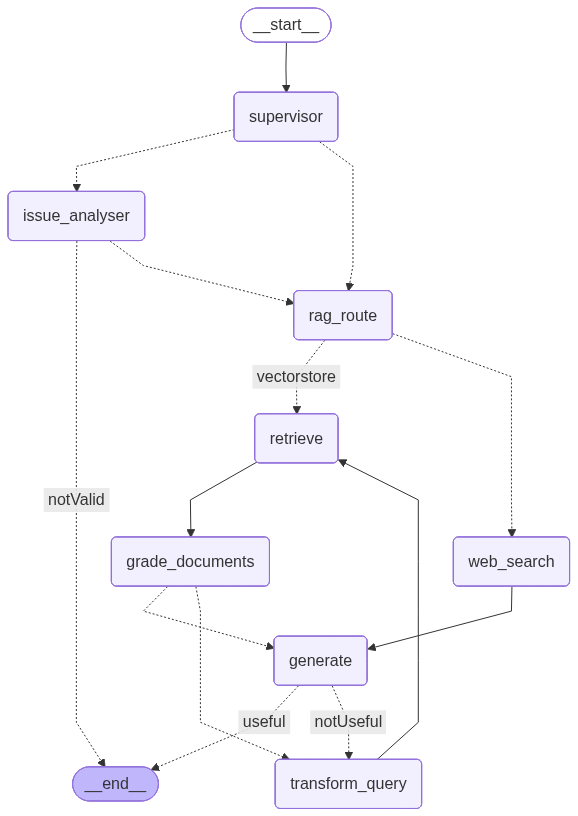

In [2]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [3]:
from agentapp.customerService import vectorstore, issue_sop_vectorstore

question = "facing issue with policy payment  "

## context
docs = vectorstore.similarity_search(
            question,
            k=3,
            filter={"category": "life-query"}
        )

print(f"docs: {docs}")

docs: [Document(id='6e496ce1-93a0-4a7a-87fe-8aa56cd936d7', metadata={'faq_id': 'Step 1 . Research and explain the tax implications of life insurance payouts in \nSwitzerland \nStep 2 . Provide information on any exceptions or special circumstances \nStep 3 . Offer guidance on how to consult with a tax advisor or financial expert', 'category': 'life-query'}, page_content='Step 1 . Research and explain the tax implications of life insurance payouts in \nSwitzerland \nStep 2 . Provide information on any exceptions or special circumstances \nStep 3 . Offer guidance on how to consult with a tax advisor or financial expert'), Document(id='b64602cd-16d0-481f-b30a-d2691dcbd4b0', metadata={'category': 'life-query', 'faq_id': '5'}, page_content='5: Can I cancel my life insurance policy if I change my mind? \nAnswer: Yes, you can cancel your life insurance policy within a certain period (usually 30 \ndays) and receive a refund of premiums paid. After this period, you may be subject to \npenalties

In [4]:
question = "What to do if insurance payments not reflected on users account"

## context
docs = issue_sop_vectorstore.similarity_search(
            question,
            k=3,
            filter={"category": "life_issue_sop"}
        )

print(f"docs: {docs}")

docs: [Document(id='5b866a1c-405b-48c2-9720-4e19c6d76705', metadata={'category': 'life_issue_sop', 'issue_id': '1'}, page_content='1: What to do if insurance payments not reflected on users account. \nSteps to follow: \n1. Call /getPaymentStatus/{userID} API, and check the payment status.  \nIf payment status fine then there is no issue with our side. \n2. If payment status is not SUCCESS, then please check then back statement doc. \nIf bank statement has user transaction details, then its fine and user account \nwill get update in few days. \n3. If back statement doc also missing the transaction details, then it is an issue \nwith the bank, we need to create support tickets for bank support to get \nresolution for the user issue.'), Document(id='88f86839-91f7-4bde-b85f-b4e506eb62cd', metadata={'category': 'life_issue_sop', 'issue_id': '3'}, page_content='3:  How to change the address of the policy holder on a specific policy. \n \nSteps to follow: \n1. Call /updateUserdetails/{userID}

In [3]:
graph.invoke({"question":"payment status not reflected for policy 12345"})

descision >>>>>>>>>>>. : step='issue_analyser' type='issue'
issue_analyser >>>>>>>>>>>. : validIssue=True missingProperties=[] issueProblemDesc='payment status not reflected' policyNumber='12345'
---ROUTE TASK CREATION---
---VALID ISSUE TO CALL TOOL---
---RAG DECISION---
source : >>>>>>>  datasource='issue_sop_vectorstore'
---ROUTE QUESTION---
state: {'vectorDecision': 'issue_sop_vectorstore', 'question': 'payment status not reflected for policy 12345', 'decision': 'issue_analyser', 'type': 'issue', 'missingProperties': [], 'issueProblemDesc': 'payment status not reflected', 'policyNumber': '12345', 'validIssue': True}
---ROUTE TO QUESTION TO RAG---
---RETRIEVE---
docs: [Document(id='5b866a1c-405b-48c2-9720-4e19c6d76705', metadata={'category': 'life_issue_sop', 'issue_id': '1'}, page_content='1: What to do if insurance payments not reflected on users account. \nSteps to follow: \n1. Call /getPaymentStatus/{userID} API, and check the payment status.  \nIf payment status fine then there 

{'question': 'payment status not reflected',
 'generation': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.',
 'documents': [Document(id='5b866a1c-405b-48c2-9720-4e19c6d76705', metadata={'category': 'life_issue_sop', 'issue_id': '1'}, page_content='1: What to do if insurance payments not reflected on users account. \nSteps to follow: \n1. Call /getPaymentStatus/{userID} API, and check the payment status.  \nIf payment status fine then there is no issue with our side. \n2. If payment status is not SUCCESS, then please check then back statement doc. \nIf bank statement has user transaction details, then its fine and user account \nwill get update in few days. \n3. If back sta

In [4]:
graph.invoke({"question":" How do I choose the right life insurance policy for my needs?"})

descision >>>>>>>>>>>. : step='rag_search' type='query'
---RAG DECISION---
source : >>>>>>>  datasource='vectorstore'
---ROUTE QUESTION---
state: {'vectorDecision': 'vectorstore', 'question': ' How do I choose the right life insurance policy for my needs?', 'decision': 'rag_search', 'type': 'query'}
---ROUTE TO QUESTION TO RAG---
---RETRIEVE---
docs: [Document(id='dae4a461-bd34-48c3-abf9-0b58648e1b69', metadata={'category': 'life-query', 'faq_id': '2'}, page_content="2: How do I choose the right life insurance policy for my needs? \nAnswer: To choose the right life insurance policy, consider your age, health, income, family \nsituation, and financial goals. You should also assess your risk tolerance and determine how \nmuch coverage you need. It's recommended to consult with a licensed insurance advisor or \nbroker to help you make an informed decision. \n• Task to execute: \nStep 1 . Develop a questionnaire to help customers assess their needs \nStep 2 . Provide a checklist of factors

{'question': 'What factors should I consider when selecting a life insurance policy that meets my specific requirements? \n',
 'generation': 'When choosing a life insurance policy, evaluate your age, health, income, family responsibilities, and long‑term financial goals to determine how much coverage you need and whether a term or whole life plan fits best. Consider your risk tolerance, budget, and whether you want a policy that builds cash value or simply provides a death benefit. Finally, review policy features and consult a licensed advisor or broker to ensure the plan aligns with your specific needs.',
 'documents': [Document(id='dae4a461-bd34-48c3-abf9-0b58648e1b69', metadata={'category': 'life-query', 'faq_id': '2'}, page_content="2: How do I choose the right life insurance policy for my needs? \nAnswer: To choose the right life insurance policy, consider your age, health, income, family \nsituation, and financial goals. You should also assess your risk tolerance and determine ho

### SOP AGENT

### Human In Loop 2

In [1]:
import os 
from dotenv import load_dotenv

from typing_extensions import Literal, TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph.message import add_messages

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

from langchain_core.tools import tool
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain.schema import AgentAction
from typing import Dict, List, Optional, Any

import uuid


In [2]:
# Load environment variables from the .env file in the same directory as this script
load_dotenv(dotenv_path="agentapp/.env")

# print(f"GROQ_API_KEY: {os.getenv('GROQ_API_KEY')}")

True

In [3]:
# Agent prompt template
agent_prompt = PromptTemplate.from_template("""
You are an intelligent assistant that can can decide and execute the tools from the given input SOP(Standard Operating Procedure) and previous tool execution response.
If the input SOP tools execution is corelated to the previous tool execution response then decide the executions that way. 
if previous tool repsponse if null then which means current tool is the first tool to get execute.
Make sure to interrupt before executing tools to get user approval
                                            
                                            
Use the following format:
SOP: the operating_procedure you must work on {operating_procedure}
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]

Available tools:
{tools}
userID:
{userID}
tool response:
{toolRes}                  

IMPORTANT TO KNOW: Please dont execute all or multiple tools all at once execute one after another                     
                                                                       

""")

class GraphState(TypedDict):
   operating_procedure: str
   messages: Annotated[Optional[List[any]], add_messages]
   toolRes: Optional[List[any]]
   userID: str

groq_api_key = os.getenv("GROQ_API_KEY")
if groq_api_key:
    os.environ["GROQ_API_KEY"] = groq_api_key
else:
    raise ValueError("GROQ_API_KEY environment variable is not set")


llm = ChatGroq(model="qwen/qwen3-32b", temperature=0)


# In-memory payment data
payment_data = {
    "U001": {"status": "success", "amount": "₹5000", "date": "2024-01-15", "name": "John Doe"},
    "U002": {"status": "failed", "amount": "₹3000", "date": "2024-01-14", "name": "Jane Smith"},
    "U003": {"status": "pending", "amount": "₹7500", "date": "2024-01-16", "name": "Bob Wilson"}
}

@tool
def get_payment_status(user_id: str) -> dict:
    """Get payment status from API for a user ID."""
    import time
    
    # Simulate API processing time
    time.sleep(1)
    
    # Access payment data directly (simulating API call)
    if user_id in payment_data:
        payment_info = payment_data[user_id]
        return {
            "user_id": user_id,
            "payment_status": payment_info["status"],
            "amount": payment_info["amount"],
            "date": payment_info["date"],
            "user_name": payment_info["name"],
            "api_response_time": "1 second"
        }
    else:
        return {
            "user_id": user_id,
            "payment_status": "failed",
            "error": "Payment record not found",
            "message": f"User ID '{user_id}' not found."
        }

@tool
def check_bank_statement(user_id: str) -> dict:
    """Get bank statement status for a user ID"""
    # return {
    #     "user_id": user_id,
    #     "status": "SUCCESS",
    # }
    return {
        "user_id": user_id,
        "status": "PENDING",
    }

@tool
def create_support_ticket(tool_input: str) -> dict:
    """Create support ticket for user issues. Input should be 'user_id,issue_description'"""
    parts = tool_input.split(',', 1)
    user_id = parts[0].strip()
    issue = parts[1].strip() if len(parts) > 1 else "General issue"
    
    return {
        "ticket_id": f"TKT-{uuid.uuid4().hex[:8].upper()}",
        "user_id": user_id,
        "issue": issue,
        "status": "created",
        "priority": "high"
    }

@tool
def change_secondName(user_id: str) -> dict:
    """Update the user secondName for a user ID"""
    return {
        "user_id": user_id,
        "status": "SUCCESS",
    }


# Create LangChain Agent
tools = [
    get_payment_status,
    create_support_ticket,
    check_bank_statement,
    change_secondName
]

llm_with_tools = llm.bind_tools(tools)

def assistant(state: GraphState):
    """Plan what actions the agent wants to take"""
    tool_descriptions = "\n".join([f"{tool.name}: {tool.description}" for tool in tools])
    tool_names = ", ".join([tool.name for tool in tools])
    
    prompt_text = agent_prompt.format(
        tools=tool_descriptions,
        tool_names=tool_names,
        operating_procedure=state["operating_procedure"],
        userID= state["userID"],
        toolRes= state.get("toolRes", [])
    )

    print(f"prompt_text >>>>>> : {prompt_text}")

    return {"messages": [llm_with_tools.invoke([prompt_text] + state.get("messages", []))]}


tools_node = ToolNode(tools)

def handle_tool_output(state):
    # Run the ToolNode manually
    tool_result = tools_node.invoke(state)
    
    # ✅ Extract the actual ToolMessage(s)
    tool_messages = tool_result.get("messages", [])
    
    messages = state.get("messages", [])
    messages.extend(tool_messages)  # ✅ add ToolMessages, not a dict

    return {
        **state,
        "toolRes": tool_messages,  # optional, for prompt reference
        "messages": messages
    }

workflow = StateGraph(GraphState)
workflow.add_node("assistant", assistant)
workflow.add_node("tools", handle_tool_output)
workflow.add_edge(START, "assistant")

workflow.add_conditional_edges("assistant", tools_condition)
workflow.add_edge("tools", "assistant")


In [4]:
# Compile
memory = MemorySaver()
graph = workflow.compile(interrupt_before=["tools"] ,checkpointer=memory)

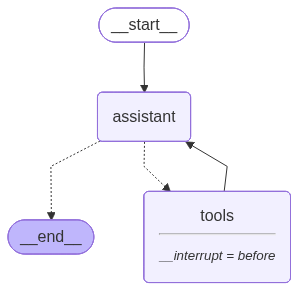

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
query = {
    "operating_procedure": "If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.",
    "userID": "U002"
}

In [7]:
thread = {"configurable": {"thread_id": "1234"}}
graph.invoke(query, thread)

prompt_text >>>>>> : 
You are an intelligent assistant that can can decide and execute the tools from the given input SOP(Standard Operating Procedure) and previous tool execution response.
If the input SOP tools execution is corelated to the previous tool execution response then decide the executions that way. 
if previous tool repsponse if null then which means current tool is the first tool to get execute.
Make sure to interrupt before executing tools to get user approval


Use the following format:
SOP: the operating_procedure you must work on If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  
If the status is not SUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  
If the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.
Thought: you should always think about what to do
Action: the action to take, should be 

{'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.',
 'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, let\'s see. The user provided a SOP for handling payment status issues. The user ID is U002, and the tool response is empty, which means we start from the beginning.\n\nFirst, the SOP says to check the payment status using get_payment_status. Since the previous tool response is null, this is the first step. I need to call get_payment_status with user_id U002. \n\nWait, the user mentioned that if the payment status isn\'t reflected, start with that API. So I should execute get_payment_status first. The parameters are jus

In [8]:
state = graph.get_state(thread)
state.next

('tools',)

In [9]:
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, let\'s see. The user provided a SOP for handling payment status issues. The user ID is U002, and the tool response is empty, which means we start from the beginning.\n\nFirst, the SOP says to check the payment status using get_payment_status. Since the previous tool response is null, this is the first step. I need to call get_payment_status with user_id U002. \n\nWait, the user mentioned that if the payment status isn\'t reflected, start with that API. So I should execute get_payment_status first. Th

In [23]:
latest_messages = state.values["messages"]

latest_message = latest_messages[-1]  # the most recent message
print(latest_message)

# Check for tool_calls
tool_calls = latest_message.additional_kwargs.get("tool_calls", [])

print(f"tool calls: {tool_calls}")

if tool_calls:
    # Extract tool names
    tool_names = [t["function"]["name"] for t in tool_calls if "function" in t]
    print("Tool calls found:", tool_names[-1])
else:
    print("No tool calls found.")

content='' additional_kwargs={'reasoning_content': 'Okay, let\'s see. The user provided the userID U002 and the payment status is failed. According to the SOP, if the payment status isn\'t successful, the next step is to check the bank statement. So I need to call check_bank_statement with the same user ID. Wait, the tools available include check_bank_statement which requires the user_id. Let me make sure that\'s the correct parameter. Yes, the user_id is U002. So the next action should be to execute check_bank_statement with user_id "U002". I should output that tool call now.\n', 'tool_calls': [{'id': 'q20zgqmdn', 'function': {'arguments': '{"user_id":"U002"}', 'name': 'check_bank_statement'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 152, 'prompt_tokens': 885, 'total_tokens': 1037, 'completion_time': 0.281760079, 'prompt_time': 0.039702673, 'queue_time': 0.050855837, 'total_time': 0.321462752}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 

In [18]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  get_payment_status (chdfqz11f)
 Call ID: chdfqz11f
  Args:
    user_id: U002
================================= Tool Message =================================
Name: get_payment_status

{"user_id": "U002", "payment_status": "failed", "amount": "₹3000", "date": "2024-01-14", "user_name": "Jane Smith", "api_response_time": "1 second"}
prompt_text >>>>>> : 
You are an intelligent assistant that can can decide and execute the tools from the given input SOP(Standard Operating Procedure) and previous tool execution response.
If the input SOP tools execution is corelated to the previous tool execution response then decide the executions that way. 
if previous tool repsponse if null then which means current tool is the first tool to get execute.
Make sure to interrupt before executing tools to get user approval


Use the following format:
SOP: the operating_procedure you must work on If a payment statu

In [19]:
state = graph.get_state(thread)
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, let\'s see. The user provided a SOP for handling payment status issues. The user ID is U002, and the tool response is empty, which means we start from the beginning.\n\nFirst, the SOP says to check the payment status using get_payment_status. Since the previous tool response is null, this is the first step. I need to call get_payment_status with user_id U002. \n\nWait, the user mentioned that if the payment status isn\'t reflected, start with that API. So I should execute get_payment_status first. Th

In [24]:
latest_messages = state.values["messages"]

latest_message = latest_messages[-1]  # the most recent message
print(latest_message)

# Check for tool_calls
tool_calls = latest_message.additional_kwargs.get("tool_calls", [])

print(f"tool calls: {tool_calls}")

if tool_calls:
    # Extract tool names
    tool_names = [t["function"]["name"] for t in tool_calls if "function" in t]
    print("Tool calls found:", tool_names[-1])
else:
    print("No tool calls found.")

content='' additional_kwargs={'reasoning_content': 'Okay, let\'s see. The user provided the userID U002 and the payment status is failed. According to the SOP, if the payment status isn\'t successful, the next step is to check the bank statement. So I need to call check_bank_statement with the same user ID. Wait, the tools available include check_bank_statement which requires the user_id. Let me make sure that\'s the correct parameter. Yes, the user_id is U002. So the next action should be to execute check_bank_statement with user_id "U002". I should output that tool call now.\n', 'tool_calls': [{'id': 'q20zgqmdn', 'function': {'arguments': '{"user_id":"U002"}', 'name': 'check_bank_statement'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 152, 'prompt_tokens': 885, 'total_tokens': 1037, 'completion_time': 0.281760079, 'prompt_time': 0.039702673, 'queue_time': 0.050855837, 'total_time': 0.321462752}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 

In [20]:
state.next

('tools',)

In [21]:
latest_messages = state.values["messages"]

latest_message = latest_messages[-1]  # the most recent message
print(latest_message)

# Check for tool_calls
tool_calls = latest_message.additional_kwargs.get("tool_calls", [])

if tool_calls:
    # Extract tool names
    tool_names = [t["function"]["name"] for t in tool_calls if "function" in t]
    print("Tool calls found:", tool_names[-1])
else:
    print("No tool calls found.")

content='' additional_kwargs={'reasoning_content': 'Okay, let\'s see. The user provided the userID U002 and the payment status is failed. According to the SOP, if the payment status isn\'t successful, the next step is to check the bank statement. So I need to call check_bank_statement with the same user ID. Wait, the tools available include check_bank_statement which requires the user_id. Let me make sure that\'s the correct parameter. Yes, the user_id is U002. So the next action should be to execute check_bank_statement with user_id "U002". I should output that tool call now.\n', 'tool_calls': [{'id': 'q20zgqmdn', 'function': {'arguments': '{"user_id":"U002"}', 'name': 'check_bank_statement'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 152, 'prompt_tokens': 885, 'total_tokens': 1037, 'completion_time': 0.281760079, 'prompt_time': 0.039702673, 'queue_time': 0.050855837, 'total_time': 0.321462752}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 

In [22]:
latest_toolRes = state.values["toolRes"]

lool_res = latest_toolRes[-1]  # the most recent message
print(lool_res)

content='{"user_id": "U002", "payment_status": "failed", "amount": "₹3000", "date": "2024-01-14", "user_name": "Jane Smith", "api_response_time": "1 second"}' name='get_payment_status' id='0244048e-14b4-4b33-8929-4b1a19c73033' tool_call_id='chdfqz11f'


In [146]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================

The payment status for user **U002** (Jane Smith) is **failed** for ₹3000 on 2024-01-14. Next, I need to check the bank statement to confirm if the transaction appears there. 

Action: check_bank_statement
Tool Calls:
  check_bank_statement (acp359qy2)
 Call ID: acp359qy2
  Args:
    user_id: U002
================================= Tool Message =================================
Name: check_bank_statement

{"user_id": "U002", "status": "PENDING"}
prompt_text >>>>>> : 
You are an intelligent assistant that can can decide and execute the tools from the given input SOP(Standard Operating Procedure) and previous tool execution response.
If the input SOP tools execution is corelated to the previous tool execution response then decide the executions that way. 
if previous tool repsponse if null then which means current tool is the first tool to get execute.
Make sure to interrupt before executing tools to get use

In [147]:
state = graph.get_state(thread)
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content="Thought: The payment status isn't reflected, so I need to start by checking the payment status for user U002 using the get_payment_status tool.\n\nAction: get_payment_status\n", additional_kwargs={'reasoning_content': "Okay, let's see. The user mentioned that the payment status isn't reflected. According to the SOP, the first step is to call the get_payment_status API for the user ID U002. The previous tool response is empty, so this is the first action. I need to check the payment status. If it's not SUCCESS, then check the bank statement. If the b

In [148]:
state.next

('tools',)

In [149]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================

The bank statement for user **U002** also shows a **PENDING** status. Since the payment is failed and the bank transaction isn’t reflected, the next step is to create a support ticket to resolve the issue.

Action: create_support_ticket
Tool Calls:
  create_support_ticket (y86695btp)
 Call ID: y86695btp
  Args:
    tool_input: U002,Payment failed (₹3000) on 2024-01-14. Bank statement shows PENDING status.
================================= Tool Message =================================
Name: create_support_ticket

{"ticket_id": "TKT-CB8C30D2", "user_id": "U002", "issue": "Payment failed (₹3000) on 2024-01-14. Bank statement shows PENDING status.", "status": "created", "priority": "high"}
prompt_text >>>>>> : 
You are an intelligent assistant that can can decide and execute the tools from the given input SOP(Standard Operating Procedure) and previous tool execution response.
If the input SOP tools execution

In [150]:
state = graph.get_state(thread)
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content="Thought: The payment status isn't reflected, so I need to start by checking the payment status for user U002 using the get_payment_status tool.\n\nAction: get_payment_status\n", additional_kwargs={'reasoning_content': "Okay, let's see. The user mentioned that the payment status isn't reflected. According to the SOP, the first step is to call the get_payment_status API for the user ID U002. The previous tool response is empty, so this is the first action. I need to check the payment status. If it's not SUCCESS, then check the bank statement. If the b

In [151]:
state.next

()